In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Configuración de parámetros
img_size = (224, 224)  # Tamaño de imagen para ResNet50
batch_size = 32
num_classes = 3  # Cambia esto según el número de clases en tu conjunto de datos
learning_rate = 1e-4
epochs = 20

# Cargar el modelo base ResNet50 preentrenado
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_size + (3,))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Crear el modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Cambia este valor según tu número de clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'  # Cambia esta ruta según tus datos de entrenamiento
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'    # Cambia esta ruta según tus datos de validación

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_resnet50.h5')


Found 2274 images belonging to 3 classes.
Found 229 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.4564 - loss: 1.2928 - val_accuracy: 0.5000 - val_loss: 0.8441
Epoch 2/50
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:18 1s/step - accuracy: 0.5000 - loss: 0.9652

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5000 - loss: 0.9652 - val_accuracy: 0.8000 - val_loss: 0.6848
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.4908 - loss: 1.0059 - val_accuracy: 0.5714 - val_loss: 0.8353
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4688 - loss: 0.8646 - val_accuracy: 0.6000 - val_loss: 1.0190
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5188 - loss: 0.9391 - val_accuracy: 0.6205 - val_loss: 0.8708
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4375 - loss: 0.9174 - val_accuracy: 0.4000 - val_loss: 0.8664
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5517 - loss: 0.9037 - val_accuracy: 0.6830 - val_loss: 0.8309
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6562 - loss: 0.7856 - val_accuracy: 0.2000 - val_loss: 0.9180
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.5811 - loss: 0.8840 - val_accuracy: 0.6920 - val_loss: 0.8234

Found 114 images belonging to 3 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6492 - loss: 0.7846
Precisión en el conjunto de prueba: 0.72
Pérdida en el conjunto de prueba: 0.73
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.00      0.00      0.00        12
   Malignant       0.96      0.72      0.83        72
      Normal       0.50      1.00      0.67        30

    accuracy                           0.72       114
   macro avg       0.49      0.57      0.50       114
weighted avg       0.74      0.72      0.70       114



C:\Users\yeiko\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yeiko\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yeiko\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


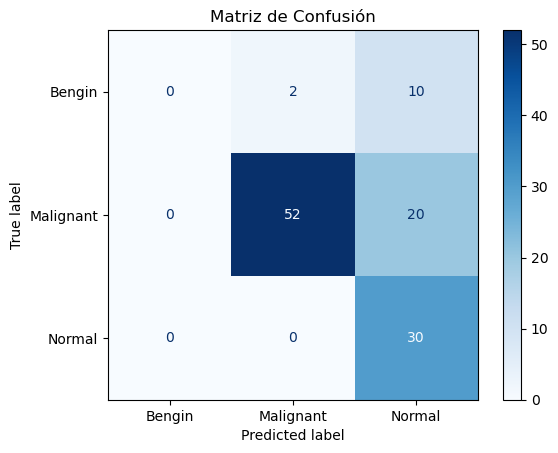

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Configuración de parámetros
img_size = (224, 224)  # Tamaño de imagen que espera ResNet
batch_size = 32

# Cargar el modelo entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_resnet50_v4.h5'  # Cambia esta ruta según tu modelo guardado
model = load_model(model_path)

# Configuración del generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'  # Cambia esta ruta según tus datos de prueba

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Importante para alinear predicciones con etiquetas
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades en etiquetas de clase
y_true = test_generator.classes  # Etiquetas reales

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


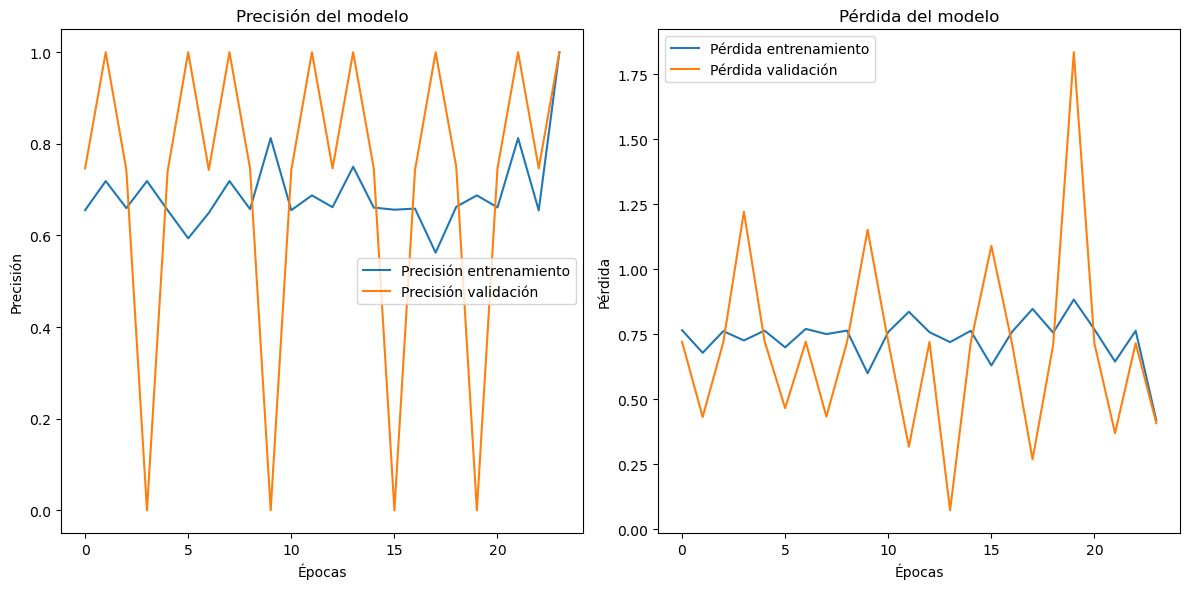

In [28]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el historial del entrenamiento del modelo
# Si ya tienes el historial, puedes cargarlo directamente o usar la variable `history`
# Ejemplo: history = model.fit(...)

# Graficar precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico para la precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)  # Subgráfico para la pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6395 - loss: 0.7757 - val_accuracy: 0.7396 - val_loss: 0.7198
Epoch 2/50
 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.5938 - loss: 0.7940

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5938 - loss: 0.7940 - val_accuracy: 1.0000 - val_loss: 0.4126
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6406 - loss: 0.7627 - val_accuracy: 0.7326 - val_loss: 0.7292
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.6469 - val_accuracy: 1.0000 - val_loss: 0.3044
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6484 - loss: 0.7800 - val_accuracy: 0.7396 - val_loss: 0.7221
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6250 - loss: 0.8675 - val_accuracy: 1.0000 - val_loss: 0.5100
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.6664 - loss: 0.7641 - val_accuracy: 0.7431 - val_loss: 0.7208
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 0.7889 - val_accuracy: 1.0000 - val_loss: 0.4404
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6440 - loss: 0.7768 - val_accuracy: 0.7500 - val_loss: 0.708

Found 141 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6831 - loss: 0.6898
Precisión en el conjunto de prueba: 0.68
Pérdida en el conjunto de prueba: 0.73
Distribución de clases en el conjunto de prueba:
{'Bengin': 39, 'Malignant': 72, 'Normal': 30}
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.84      0.67      0.74        39
   Malignant       1.00      0.58      0.74        72
      Normal       0.41      0.93      0.57        30

    accuracy                           0.68       141
   macro avg       0.75      0.73      0.68       141
weighted avg       0.83      0.68      0.70       141



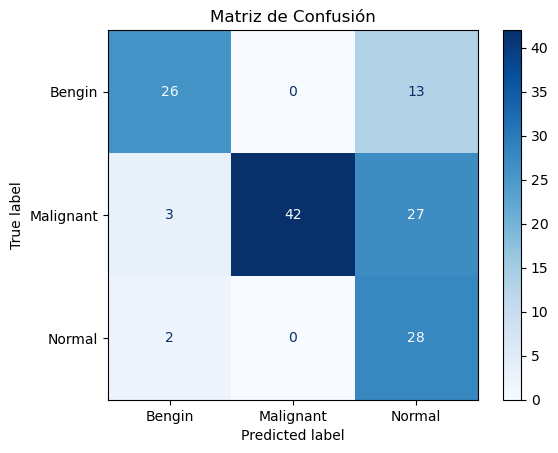

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 50
learning_rate = 1e-5

# Cargar el modelo previamente entrenado
model_path = 'D:/UPN/Capstone/Modelos/modelo_resnet50_v12.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Modelo no encontrado en la ruta: {model_path}")
model = load_model(model_path)

# Congelar capas base y descongelar las últimas para fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False

# Compilar el modelo con una nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular pesos de clase para manejar datos desbalanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Reentrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict  # Aplicar pesos de clase
)

# Guardar el modelo reentrenado
model.save('D:/UPN/Capstone/Modelos/modelo_resnet50_v13.h5')

# Evaluar el modelo en el conjunto de prueba
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Distribución de clases en el conjunto de prueba
print("Distribución de clases en el conjunto de prueba:")
print(dict(zip(test_generator.class_indices.keys(), np.bincount(test_generator.classes))))

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación con manejo de etiquetas sin predicciones
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 30
learning_rate = 1e-5

# Cargar el modelo previamente entrenado
model_path = 'D:/UPN/Capstone/Modelos/modelo_resnet50_v13.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Modelo no encontrado en la ruta: {model_path}")
model = load_model(model_path)

# Congelar capas base y descongelar las últimas para fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False

# Compilar el modelo con una nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular pesos de clase para manejar datos desbalanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Definir los callbacks para EarlyStopping y LR Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Reentrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict,  # Aplicar pesos de clase
    callbacks=[early_stopping, lr_scheduler]
)

# Guardar el modelo reentrenado
model.save('D:/UPN/Capstone/Modelos/modelo_resnet50_v14.h5')

# Evaluar el modelo en el conjunto de prueba
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Distribución de clases en el conjunto de prueba
print("Distribución de clases en el conjunto de prueba:")
print(dict(zip(test_generator.class_indices.keys(), np.bincount(test_generator.classes))))

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación con manejo de etiquetas sin predicciones


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/30


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6591 - loss: 0.7599 - val_accuracy: 0.7465 - val_loss: 0.7209 - learning_rate: 1.0000e-05
Epoch 2/30
 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.7188 - loss: 0.6785

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7188 - loss: 0.6785 - val_accuracy: 1.0000 - val_loss: 0.4314 - learning_rate: 1.0000e-05
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6608 - loss: 0.7588 - val_accuracy: 0.7431 - val_loss: 0.7190 - learning_rate: 1.0000e-05
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.7259 - val_accuracy: 0.0000e+00 - val_loss: 1.2214 - learning_rate: 1.0000e-05
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6479 - loss: 0.7765 - val_accuracy: 0.7396 - val_loss: 0.7241 - learning_rate: 1.0000e-05
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5938 - loss: 0.6994 - val_accuracy: 1.0000 - val_loss: 0.4654 - learning_rate: 1.0000e-05
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6403 - loss: 0.7784 - val_accuracy: 0.7431 - val_loss: 0.7207 - learning_rate: 1.0000e-05
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.7

Found 141 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6868 - loss: 0.6846
Precisión en el conjunto de prueba: 0.69
Pérdida en el conjunto de prueba: 0.72
Distribución de clases en el conjunto de prueba:
{'Bengin': 39, 'Malignant': 72, 'Normal': 30}
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
